In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('dataset2.csv')

In [ ]:
import seaborn as sns


In [ ]:
df.head(10)

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
5,F,57,1.604690,79.076932
6,F,56,1.600986,98.521654
7,F,67,1.602997,52.798438
8,F,16,1.657872,88.473695
9,M,37,1.914266,132.305075


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     10000 non-null  object 
 1   age     10000 non-null  int64  
 2   height  10000 non-null  float64
 3   weight  10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


<Axes: xlabel='height', ylabel='weight'>

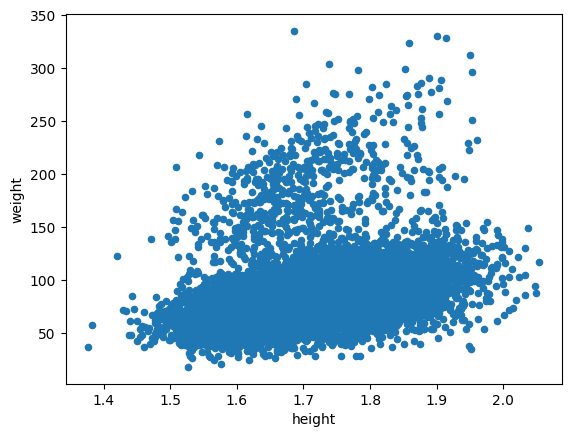

In [ ]:
df.plot(x='height', y='weight', kind='scatter' )

# Podemos ver que a maioria das pessoas têm peso entre 50kg e aproximadamente 120kg. Além disso, há muitos casos de pessoas com peso extremamente altos.

<Axes: >

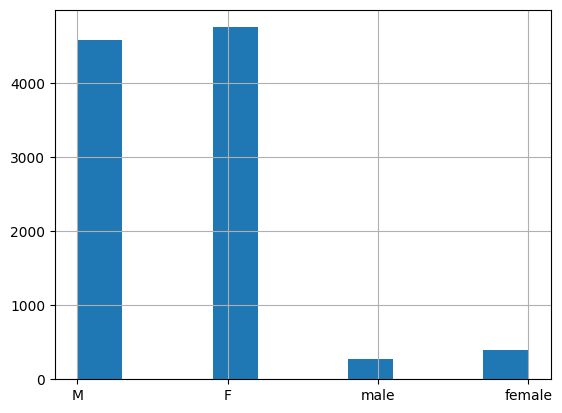

In [ ]:
df['sex'].hist()

<Axes: xlabel='sex', ylabel='weight'>

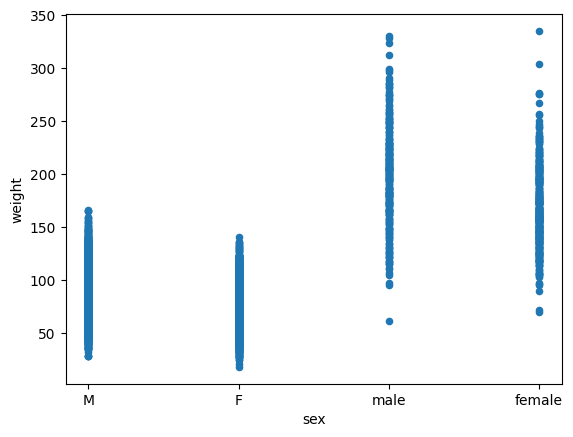

In [ ]:
df.plot(x='sex', y='weight', kind='scatter' )

<Axes: xlabel='sex', ylabel='height'>

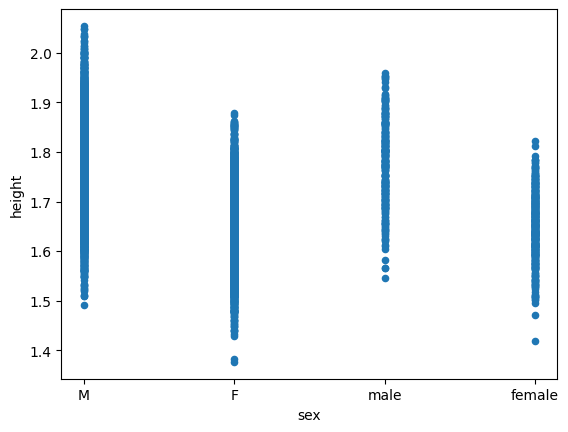

In [ ]:
df.plot(x='sex', y='height', kind='scatter')

# Acredito que em determinados casos, o peso está em libras e não em quilos. Portanto, os converti para kg.

In [ ]:
df.loc[df['sex'] == 'male', 'weight'] = df.loc[df['sex'] == 'male', 'weight']*0.453592

In [ ]:
df.loc[df['sex'] == 'female', 'weight'] = df.loc[df['sex'] == 'female', 'weight']*0.453592

<Axes: xlabel='sex', ylabel='weight'>

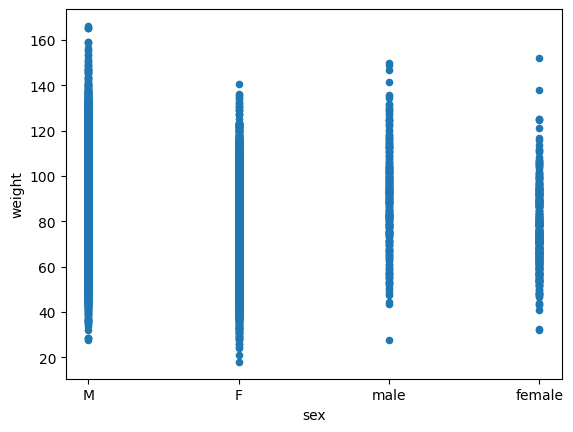

In [ ]:
df.plot(x='sex', y='weight', kind='scatter' )

In [ ]:
df['sex'].replace('male', 'M', inplace=True)
df['sex'].replace('female', 'F', inplace=True)

<Axes: >

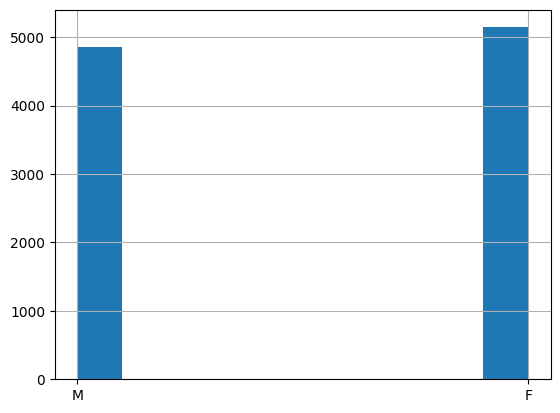

In [ ]:
df['sex'].hist()

In [ ]:
df['imc'] = df['weight'] / df['height']**2


In [ ]:
df.head()

,sex,age,height,weight,imc
0,M,62,1.874021,114.384199,32.569938
1,F,44,1.672676,76.031332,27.174950
2,F,49,1.587970,46.403086,18.401889
3,F,25,1.653451,104.352744,38.169932
4,M,65,1.744867,76.831890,25.235778


# Outliers univariados são valores não usuais de uma feature. Já os multivariados são aqueles resultantes da combinação dos outliers univariados de pelo menos duas features

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a2f70a440>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a2f70a980>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a2f70a2c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a2f70aec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a2f70b160>],
 'means': []}

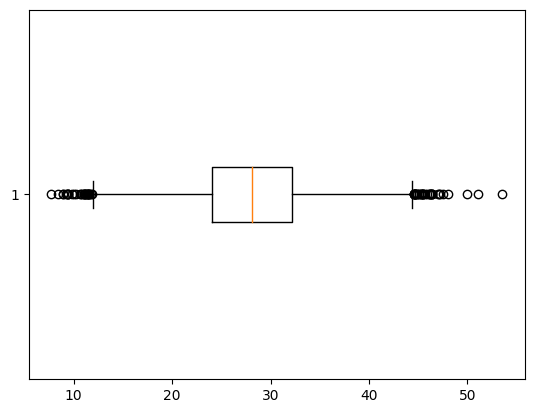

In [ ]:
plt.boxplot(df['imc'], vert=False)

# Com o boxplot, podemos identificar os outliers e assim eliminá-los. Esses outliers são multivariados, pois resultam de equações envolvendo duas features

In [ ]:
Q1 = df['imc'].quantile(0.25)
Q3 = df['imc'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_filtrado = df[(df['imc'] >= limite_inferior) & (df['imc'] <= limite_superior)]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a2f57bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a2f5ac550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a2f57bd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a2f5aca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a2f5acd60>],
 'means': []}

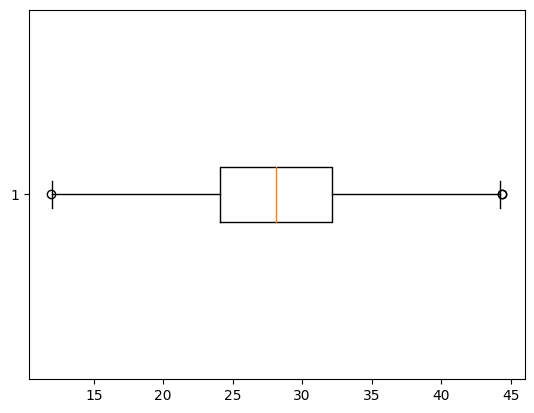

In [ ]:
plt.boxplot(df_filtrado['imc'], vert=False)

In [ ]:
total_pessoas = len(df_filtrado)
pessoas_na_faixa = len(df_filtrado[(df_filtrado['imc'] >= 18.5) & (df_filtrado['imc'] <= 24.9)])
porcentagem_fora_da_faixa = (1 - (pessoas_na_faixa / total_pessoas)) * 100

In [ ]:
print(f"A porcentagem de pessoas fora da faixa saudável é: {porcentagem_fora_da_faixa:.2f}%")

A porcentagem de pessoas fora da faixa saudável é: 75.78%


<Axes: xlabel='sex', ylabel='height'>

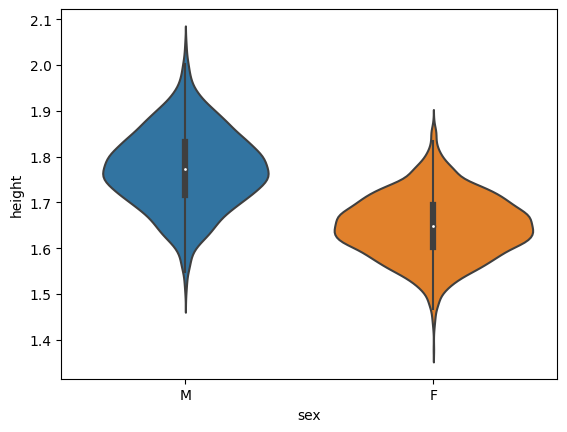

In [ ]:
sns.violinplot(x=df_filtrado['sex'], y=df_filtrado['height'])

<Axes: xlabel='sex', ylabel='weight'>

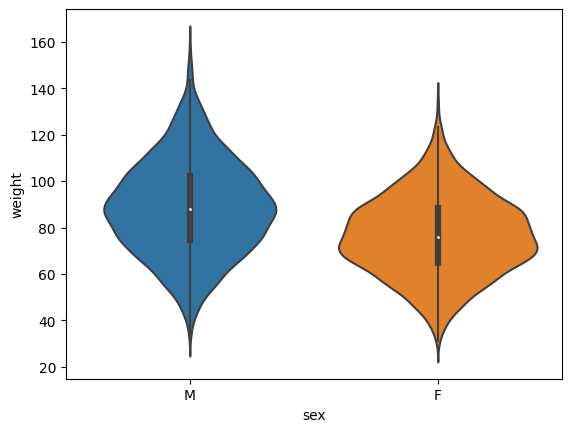

In [ ]:
sns.violinplot(x=df_filtrado['sex'], y=df_filtrado['weight'])

# A análise que podemos fazer é acerca das faixas em que há maior densidadade de pessoas: homens com peso entre 80 e 100 e altura entre 1.7 e 1.8 e mulheres com peso entre 60 e 80 e altura entre 1.6 e 1.7. Também podemos observar os máximos e mínimos para cada feature e cada sexo.